In [1]:
import pandas as pd

import numpy as np
import skcriteria as skc
import skcriteria.agg as madm
# See documentation at: https://scikit-criteria.readthedocs.io/_/downloads/en/0.5/pdf/
# https://scikit-criteria.quatrope.org/en/latest/tutorial/quickstart.html
from skcriteria.agg import similarity # here lives TOPSIS
from skcriteria.pipeline import mkpipe # this function is for create pipelines
from skcriteria.preprocessing import invert_objectives, scalers
from skcriteria.agg import simple
import seaborn as sns
import matplotlib.pyplot as plt

import sys

In [2]:
df = pd.read_pickle("./data/pre-processed-metrics-dataframe.pkl")

Using a Multi-Criteria Decision Making Method (MCDM) called TOPSIS (Technique for Order of Preference by Similarity to Ideal Solution)

Aggregate the performance metrics for each algorithm

In [3]:
primary_metrics = [
    "SLR",
    "speedup",
    "exec_time",
    "efficiency_processors",
    "efficiency_cores"
]

In [4]:
df[primary_metrics + ["scheduler"]].groupby("scheduler").std()

,SLR,speedup,exec_time,efficiency_processors,efficiency_cores
scheduler,,,,,
DLS,1678.274842,12.491298,7.668095,1.662247,0.306060
"DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors]",1679.103198,2.511232,0.122863,0.263704,0.281890
"DYTAS[navigation=All,sorting=DFS,multicore=UseAllCores]",1678.650663,10.218337,0.124973,1.394708,0.279978
"DYTAS[navigation=All,sorting=Khan,multicore=SkipActiveProcessors]",1679.102825,2.499129,0.115205,0.264530,0.282238
"DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores]",1678.650816,10.083256,0.128288,1.375778,0.279984
"DYTAS[navigation=Front,sorting=DFS,multicore=SkipActiveProcessors]",1679.083454,2.077904,0.123054,0.216609,0.225341
"DYTAS[navigation=Front,sorting=DFS,multicore=UseAllCores]",1678.626741,7.520499,0.072739,0.971320,0.228070
"DYTAS[navigation=Front,sorting=Khan,multicore=SkipActiveProcessors]",1679.101637,2.467386,0.130510,0.259478,0.275699
"DYTAS[navigation=Front,sorting=Khan,multicore=UseAllCores]",1678.648945,9.591898,0.083976,1.278955,0.274028


Since the standard deviation for the results are quite high (given that the data is very left skewed) it would be a more fair comparison to use the median rather than mean value.

In [5]:
df[primary_metrics + ["scheduler"]].groupby("scheduler").mean()

,SLR,speedup,exec_time,efficiency_processors,efficiency_cores
scheduler,,,,,
DLS,47.466804,9.112547,1.932245,1.225191,0.302665
"DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors]",49.652313,4.468551,0.073873,0.568397,0.222198
"DYTAS[navigation=All,sorting=DFS,multicore=UseAllCores]",48.033792,7.940162,0.069758,1.079818,0.267704
"DYTAS[navigation=All,sorting=Khan,multicore=SkipActiveProcessors]",49.660325,4.473977,0.074507,0.569507,0.222430
"DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores]",48.047356,7.893514,0.066767,1.073457,0.267246
"DYTAS[navigation=Front,sorting=DFS,multicore=SkipActiveProcessors]",50.596460,3.543781,0.069230,0.446382,0.174729
"DYTAS[navigation=Front,sorting=DFS,multicore=UseAllCores]",49.164828,5.356505,0.051948,0.701770,0.197837
"DYTAS[navigation=Front,sorting=Khan,multicore=SkipActiveProcessors]",49.704576,4.378261,0.068898,0.556196,0.217119
"DYTAS[navigation=Front,sorting=Khan,multicore=UseAllCores]",48.112191,7.483229,0.051685,1.003270,0.257128


In [6]:
df[primary_metrics + ["scheduler"]].groupby("scheduler").median()

,SLR,speedup,exec_time,efficiency_processors,efficiency_cores
scheduler,,,,,
DLS,1.000108,5.500601,0.329860,0.723625,0.153279
"DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors]",1.688838,3.764629,0.037934,0.577027,0.072525
"DYTAS[navigation=All,sorting=DFS,multicore=UseAllCores]",1.071478,5.146146,0.035961,0.681571,0.136228
"DYTAS[navigation=All,sorting=Khan,multicore=SkipActiveProcessors]",1.681602,3.796969,0.039291,0.575371,0.072423
"DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores]",1.070151,5.146365,0.035906,0.683948,0.136151
"DYTAS[navigation=Front,sorting=DFS,multicore=SkipActiveProcessors]",2.107824,2.926132,0.034683,0.409771,0.055717
"DYTAS[navigation=Front,sorting=DFS,multicore=UseAllCores]",1.727543,3.459695,0.031297,0.470667,0.076051
"DYTAS[navigation=Front,sorting=Khan,multicore=SkipActiveProcessors]",1.733282,3.688222,0.034012,0.558831,0.070232
"DYTAS[navigation=Front,sorting=Khan,multicore=UseAllCores]",1.141516,4.887929,0.030267,0.659165,0.122193


In [12]:
df_medians =  df[primary_metrics + ["scheduler"]].groupby("scheduler").median()

In [8]:
# Criteria for each metric in order
objectives = [
    min,
    max,
    min,
    max,
    max
]

I cannot give the execution time that much power in terms of weight since it ends up heavily influencing the results in favor of DYTAS

In [9]:
# Weight for each metric in order
weights = np.array([.45, .2, 0.05, .15, .15])

In [10]:
def calculate_weighted_sum(df, primary_metrics, objectives, weights):

    if sum(weights) != 1:
        print("Error: make sure the weights add to 1.")
        sys.exit(0)
    
    matrix = df.values
    
    decision_matrix = skc.mkdm(
        matrix,
        objectives = objectives,
        weights=weights,
        criteria=df.columns.tolist(),
        alternatives=df.index
    )
    
    decision_matrix
    
    decision_matrix.weights
    
    # decision_matrix.plot()
    # plt.show()
    # decision_matrix.plot.wheatmap()
    # plt.show()
    # decision_matrix.plot("kde")
    # plt.show()
    # Inverting min criteria to max criteria for
    # better calculation (according to the documentation)
    inverter = invert_objectives.InvertMinimize()
    dmt = inverter.transform(decision_matrix)
    
    # Scaling / normalizing these values now.
    # By specifying both targets, the matrix and weights
    # are scaled.
    scaler = scalers.SumScaler(target="both")
    dmt = scaler.transform(dmt)
    
    # we are going to user matplotlib capabilities of creat multiple figures

    
    # # we create 2 axis with the same y axis
    # fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # # in the first axis we plot the criteria KDE
    # dmt.plot.kde(ax=axs[0])
    # axs[0].set_title("Criteria")
    
    
    # # in the second axis we plot the weights as bars
    # dmt.plot.wbar(ax=axs[1])
    # axs[1].set_title("Weights")
    
    # # adjust the layout of the figute based on the content
    # fig.tight_layout()
    # plt.show()
    
    dec = simple.WeightedSumModel()
    rank = dec.evaluate(dmt)  # we use the tansformed version of the data
    
    score = rank.to_series()
    score[:] = rank.e_.score
    score = score.sort_values(ascending=False)
    
    
    pd.DataFrame(score)
    sns.barplot(pd.DataFrame(score), y="Alternatives", x="Rank")
    plt.show()

Overall best based on medians.

/tmp/ipykernel_6282/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09331485 0.07141191 0.09091018 0.07140708 0.0908919  0.06467857
 0.07656698 0.07106028 0.08983542 0.09098198 0.0911905  0.09775034]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


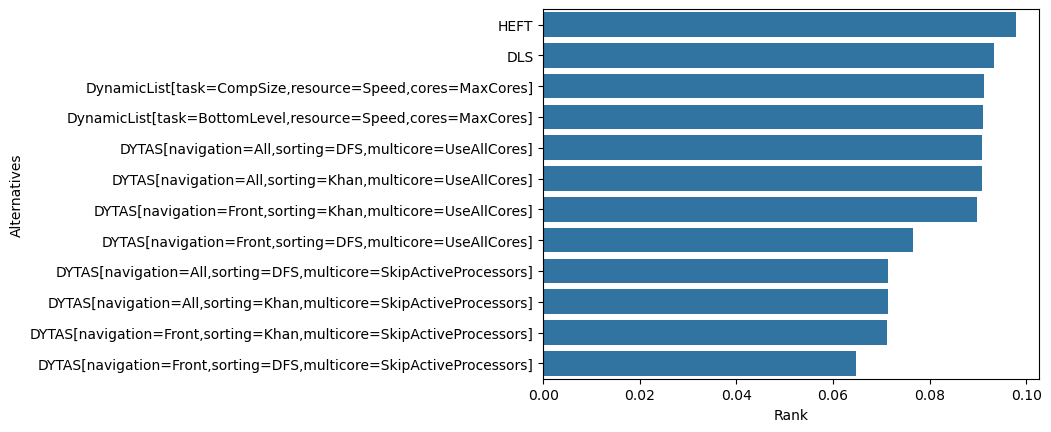

In [11]:
calculate_weighted_sum(df_medians, primary_metrics, objectives, weights)

Overall based on means

/tmp/ipykernel_6282/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09331485 0.07141191 0.09091018 0.07140708 0.0908919  0.06467857
 0.07656698 0.07106028 0.08983542 0.09098198 0.0911905  0.09775034]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


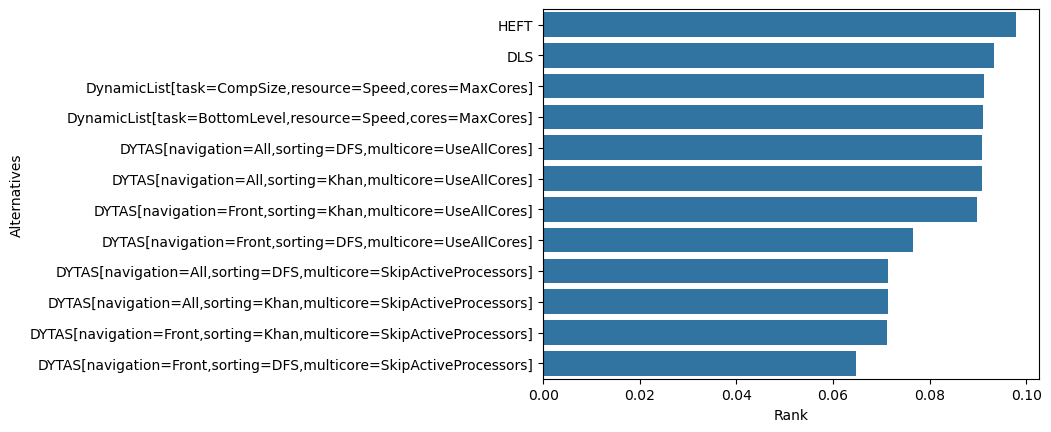

In [13]:
df_means =  df[primary_metrics + ["scheduler"]].groupby("scheduler").mean()

calculate_weighted_sum(df_means, primary_metrics, objectives, weights)

/tmp/ipykernel_6282/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.08535042 0.08159362 0.08434295 0.08158045 0.08431914 0.08007105
 0.08240264 0.08150782 0.08420551 0.08465661 0.08461384 0.08535595]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


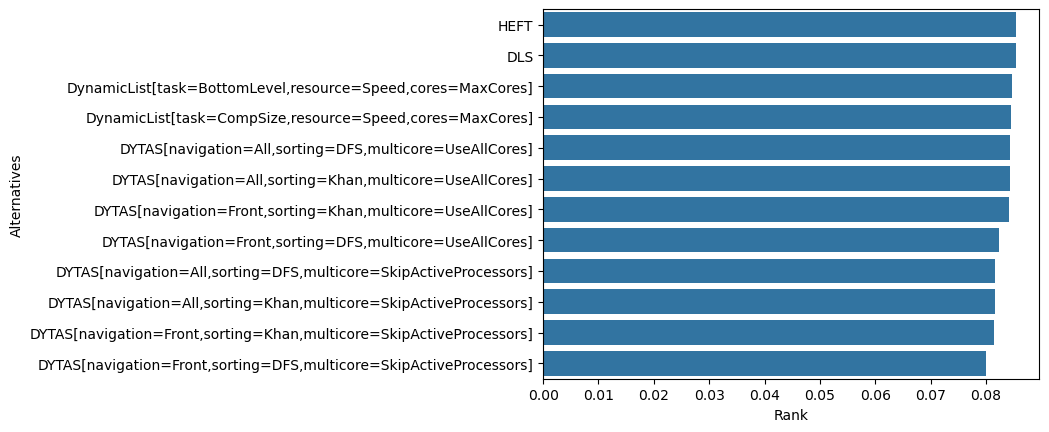

In [14]:
# SLR only
calculate_weighted_sum(df_means, primary_metrics, objectives, [1,0,0,0,0])

/tmp/ipykernel_6282/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.1046369  0.06196463 0.09766715 0.0622313  0.09778834 0.04964753
 0.06057636 0.06037579 0.09167479 0.10457297 0.1042266  0.10463762]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


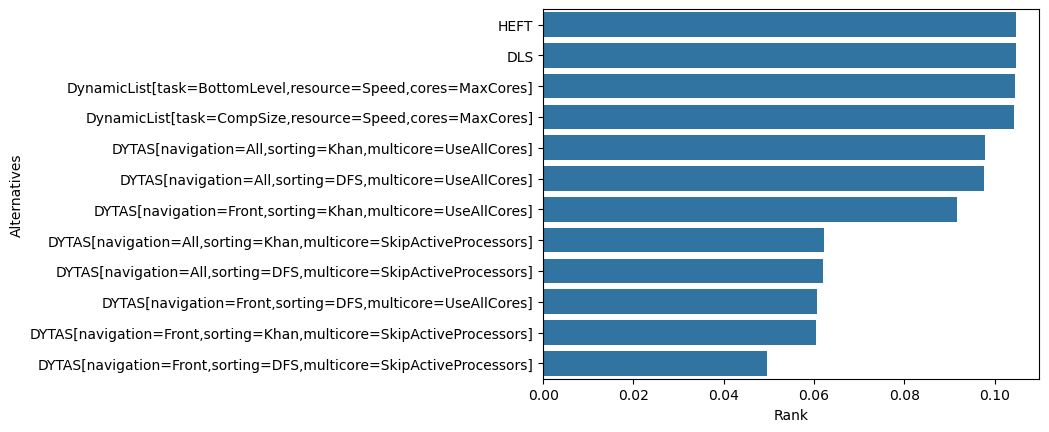

In [15]:
# SLR only
calculate_weighted_sum(df_medians, primary_metrics, objectives, [1,0,0,0,0])

Controlling for Heterogeneity and Homogeneity of systems

In [36]:
df_het = df[df.system_type == "heterogeneous"]
df_hom = df[df.system_type == "homogeneous"]

In [37]:
df_het[primary_metrics + ["scheduler"]].groupby("scheduler").mean()

,SLR,speedup,exec_time,efficiency_processors,efficiency_cores
scheduler,,,,,
DLS,56.782080,8.488241,2.041720,1.131729,0.270765
"DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors]",59.563288,3.489167,0.072592,0.452660,0.176649
"DYTAS[navigation=All,sorting=DFS,multicore=UseAllCores]",57.555783,6.675798,0.068638,0.916664,0.217797
"DYTAS[navigation=All,sorting=Khan,multicore=SkipActiveProcessors]",59.574787,3.495600,0.073652,0.453765,0.176769
"DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores]",57.574747,6.635750,0.066367,0.911353,0.217334
"DYTAS[navigation=Front,sorting=DFS,multicore=SkipActiveProcessors]",60.665094,2.814564,0.067632,0.360525,0.140881
"DYTAS[navigation=Front,sorting=DFS,multicore=UseAllCores]",58.844580,4.466404,0.048898,0.585184,0.161192
"DYTAS[navigation=Front,sorting=Khan,multicore=SkipActiveProcessors]",59.639938,3.395876,0.067691,0.439824,0.171204
"DYTAS[navigation=Front,sorting=Khan,multicore=UseAllCores]",57.668523,6.131368,0.050290,0.828136,0.205995


In [38]:
df_het[primary_metrics + ["scheduler"]].groupby("scheduler").median()

,SLR,speedup,exec_time,efficiency_processors,efficiency_cores
scheduler,,,,,
DLS,1.000776,5.323540,0.336580,0.673862,0.150457
"DYTAS[navigation=All,sorting=DFS,multicore=SkipActiveProcessors]",1.929191,2.879158,0.037529,0.457347,0.056458
"DYTAS[navigation=All,sorting=DFS,multicore=UseAllCores]",1.209305,4.639222,0.035413,0.614431,0.125320
"DYTAS[navigation=All,sorting=Khan,multicore=SkipActiveProcessors]",1.914638,2.890381,0.039083,0.456202,0.056461
"DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores]",1.211564,4.626302,0.035371,0.612278,0.125408
"DYTAS[navigation=Front,sorting=DFS,multicore=SkipActiveProcessors]",2.472198,2.533115,0.034284,0.336957,0.043003
"DYTAS[navigation=Front,sorting=DFS,multicore=UseAllCores]",1.986929,3.030604,0.030458,0.428006,0.070604
"DYTAS[navigation=Front,sorting=Khan,multicore=SkipActiveProcessors]",1.993683,2.851363,0.033662,0.438179,0.054087
"DYTAS[navigation=Front,sorting=Khan,multicore=UseAllCores]",1.410156,4.290168,0.029598,0.594669,0.111195


In [39]:
df_het_median = df_het[primary_metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.10737859 0.06055963 0.09587991 0.06059056 0.09571556 0.04936556
 0.06257818 0.05941298 0.0872288  0.10598306 0.10430239 0.11100478]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


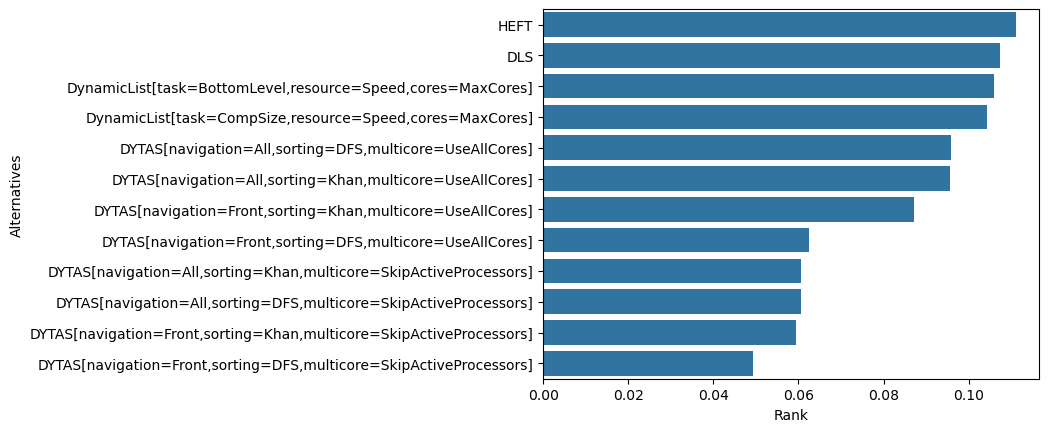

In [40]:
calculate_weighted_sum(df_het_median, primary_metrics, objectives, weights)

Heterogeneous systems shows the same patter of results as seen before.

In [41]:
df_hom_median = df_hom[primary_metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09013126 0.07911068 0.09395354 0.07908493 0.09399666 0.05744422
 0.06304985 0.07699703 0.0907653  0.09059565 0.0912327  0.09363818]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


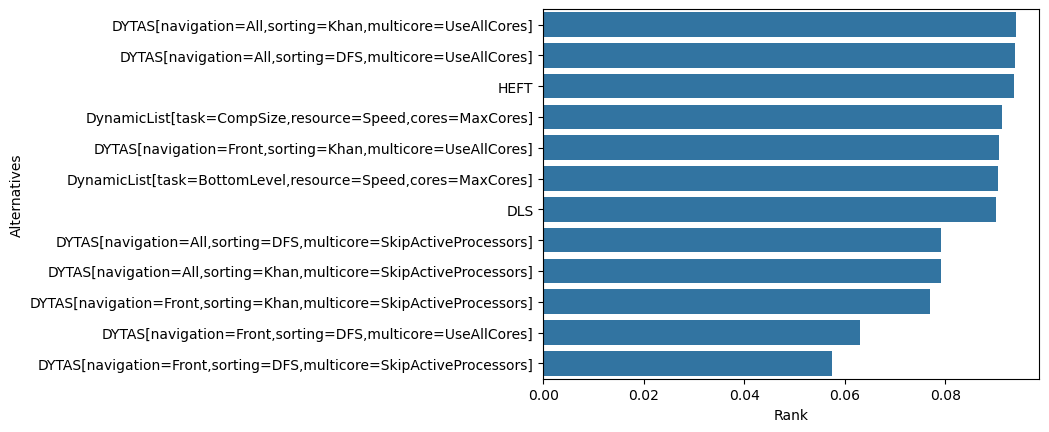

In [42]:
calculate_weighted_sum(df_hom_median, primary_metrics, objectives, weights)

**Interesting** We see that the improved/proposed DYTAS, in homogeneous systems, beats HEFT, but not by much. HEFT still holds an edge over DLS and DynamicList. But another shift we see is that DynamicList gets ahead of DLS in homogeneous systems.

Statistical significance of these results need to be performed, but the improvement is quite marginal.

Now controlling for single core systems

In [43]:
df_single_core = df[df.processor_count == df.core_count]

In [44]:
metrics = ["SLR", "speedup", "exec_time"]
objectives = [min, max, min]
weights = [.5, .4, .1]

In [45]:
df_single_core_median = df_single_core[metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0958695  0.08239829 0.08170207 0.08240496 0.08213949 0.06867388
 0.06843337 0.08230402 0.08203659 0.08596385 0.08601363 0.10206035]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


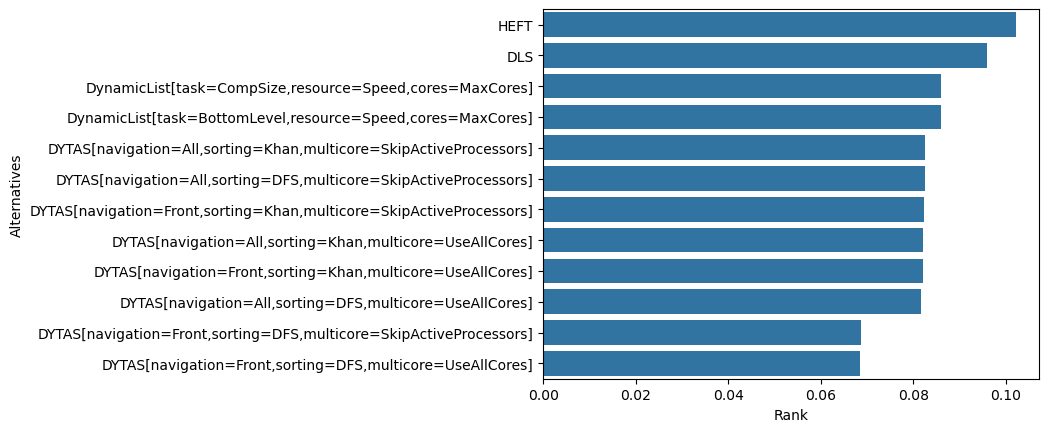

In [46]:
calculate_weighted_sum(df_single_core_median, metrics, objectives, weights)

In [47]:
df_multi_core = df[df.processor_count != df.core_count]

In [48]:
df_multi_core_median = df_multi_core[metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0935097  0.06486677 0.099441   0.06484056 0.09962722 0.05366554
 0.07055096 0.06444818 0.09653816 0.09499717 0.0965523  0.10096245]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


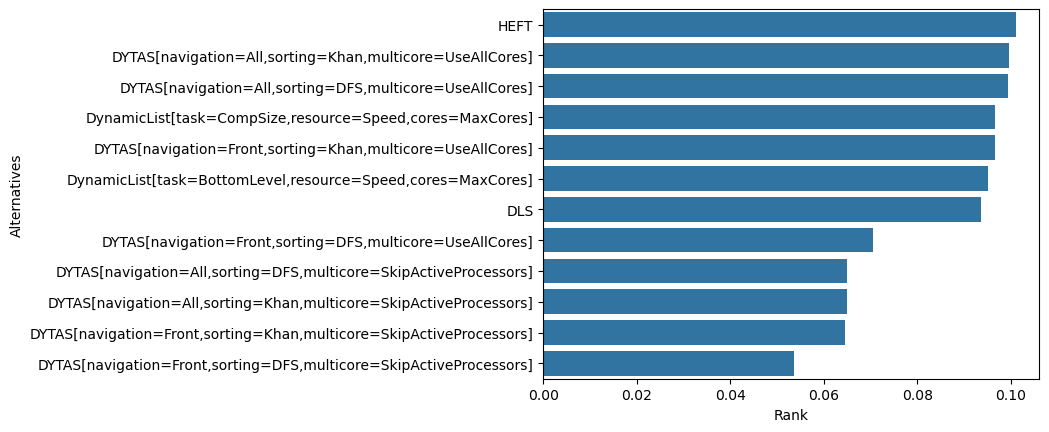

In [49]:
calculate_weighted_sum(df_multi_core_median, metrics, objectives, weights)

**Interesting** We see that, opposite to what I was expecting, in single core benchmarks the results are similar to the overall results, but when taking into consideration only multi-cores systems, although HEFT still performs the best, the proposed DYTAS implementation beats DynamicList and DLS, whilst traditional DYTAS falls short.

NOTE: I modified the metrics to remove efficiency, in case it impacted these results much, but even removing efficiency resulted in the same results.

Now controlling for network model

In [50]:
metrics = ["SLR", "speedup", "exec_time", "efficiency_processors", "efficiency_cores"]
objectives = [min, max, min, max, max]
weights = np.array([.45, .2, 0.05, .15, .15])

In [51]:
df.network_model.unique()

array(['ConstantBandwidth', 'SharedBandwidth'], dtype=object)

In [52]:
df_sharedbw = df[df.network_model == "SharedBandwidth"]
df_constantbw = df[df.network_model == "ConstantBandwidth"]

In [53]:
df_sharedbw_median = df_sharedbw[metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09918291 0.06652993 0.09659425 0.06652815 0.09653935 0.05299185
 0.06370453 0.06542904 0.0917179  0.09898506 0.09914395 0.10265308]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


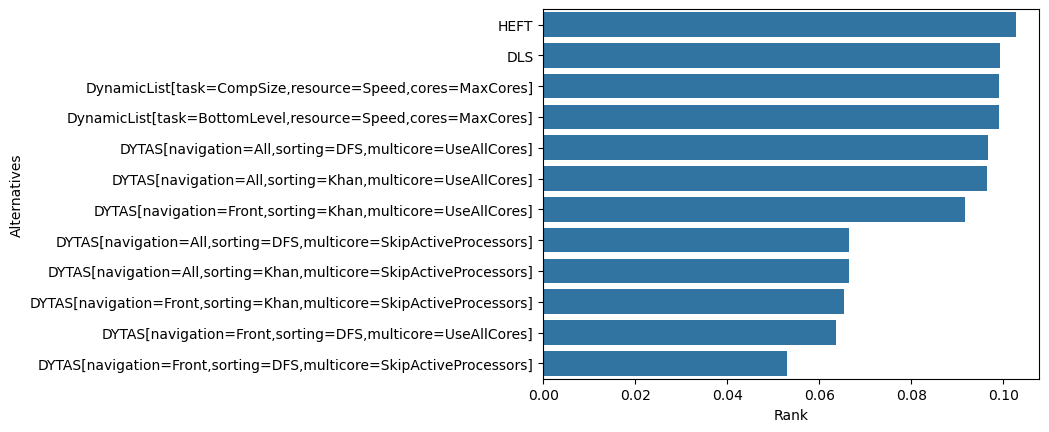

In [54]:
calculate_weighted_sum(df_sharedbw_median, metrics, objectives, weights)

In [55]:
df_constantbw_median = df_constantbw[metrics + ["scheduler"]].groupby("scheduler").median()

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.0993887  0.06585018 0.09683259 0.0658242  0.09702571 0.05254782
 0.06366117 0.06486358 0.09226977 0.09930736 0.09967793 0.10275099]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


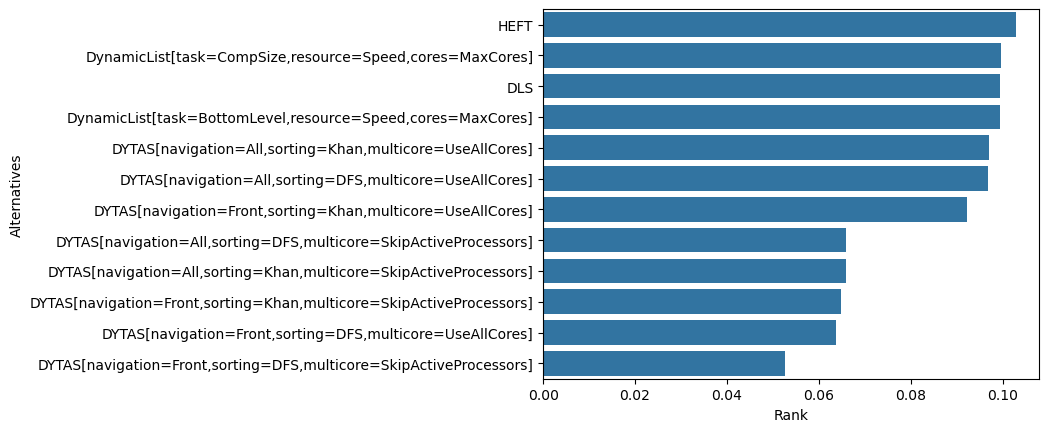

In [56]:
calculate_weighted_sum(df_constantbw_median, metrics, objectives, weights)

Suprisingly, controlling for network model did change some results slightly. But the increase in rank from the DynamicList variant could be insignificant.

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09954397 0.06666306 0.09643751 0.06664706 0.09638135 0.05297004
 0.06351051 0.06553627 0.09152669 0.09887396 0.09892767 0.10298191]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


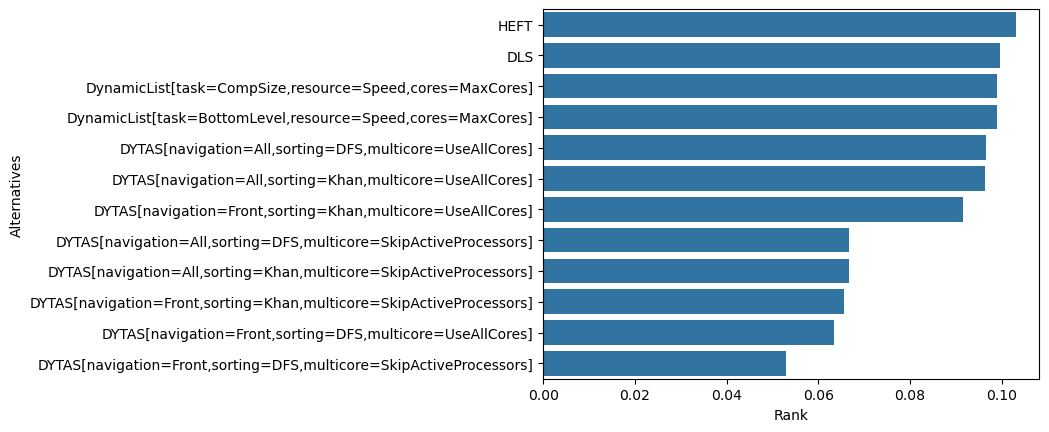

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09921456 0.06604107 0.09678876 0.06604913 0.09693079 0.05277611
 0.06360081 0.06506344 0.09204592 0.09929467 0.09958408 0.10261068]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


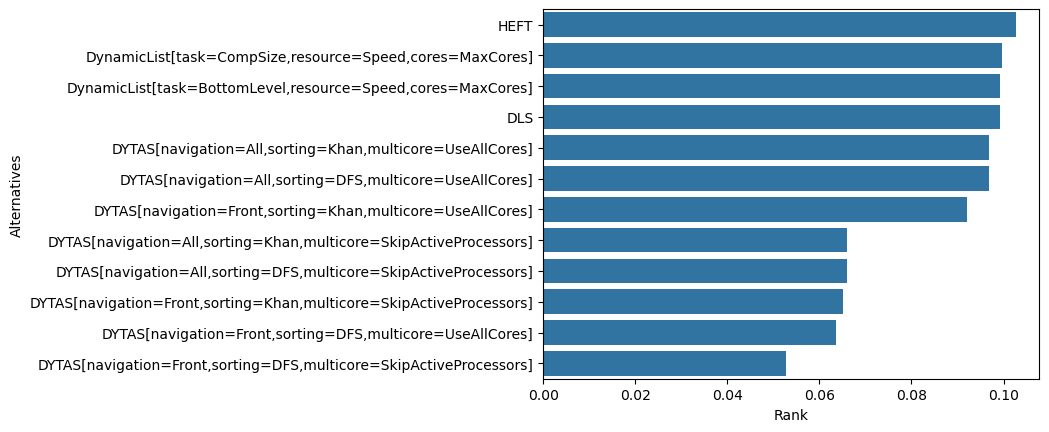

/tmp/ipykernel_6662/1178827212.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09925124 0.06578651 0.09683976 0.06573798 0.09708049 0.05257484
 0.0637655  0.06483466 0.09227681 0.09946225 0.09973642 0.10265353]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  score[:] = rank.e_.score


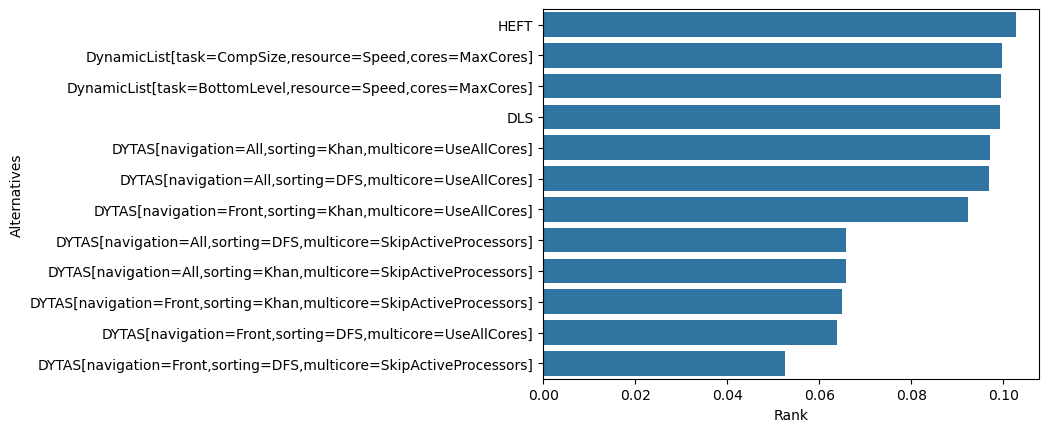

In [57]:
# Controlling for bandwidth speed

df_125bw = df[df.network_bandwidth == 125]
df_1250bw = df[df.network_bandwidth == 1250]
df_12500bw = df[df.network_bandwidth == 12500]

# In[47]:
df_125bw_median = df_125bw[metrics + ["scheduler"]].groupby("scheduler").median()
df_1250bw_median = df_1250bw[metrics + ["scheduler"]].groupby("scheduler").median()
df_12500bw_median = df_12500bw[metrics + ["scheduler"]].groupby("scheduler").median()
# In[ ]:
calculate_weighted_sum(df_125bw_median, metrics, objectives, weights)
calculate_weighted_sum(df_1250bw_median, metrics, objectives, weights)
calculate_weighted_sum(df_12500bw_median, metrics, objectives, weights)


We only see that dynamic list slightly increases in rank over DLS but it might be by quite an insignificant amount.

Given all of these results, and the Dunn's tests done in another notebook, in terms of DYTAS variants, the variant with navigation=All and multicore=UseAllCores are the bests. No statistically significant difference was found in terms of changing their sorting method when doing Dunn's tests. Out of simplicity, I will chose Khan as the sortting method for both the improved and the normal variant of DYTAS, as Khan does provide better performance for the normal variant of DYTAS.